In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf #pip install yfinance
import mplfinance as mpf
# tick = yf.Ticker('^GSPC')
tick = yf.Ticker('SPY')
hist = tick.history(period="120D", rounding=True)
#hist = hist[:'2019-10-07']
# hist = hist[-1000:]
# h = hist.Close.tolist()

In [2]:
hist.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2023-01-13 00:00:00-05:00,393.62,399.10,393.34,398.50,63863400,0.0,0.0,0.0
2023-01-17 00:00:00-05:00,398.48,400.23,397.06,397.77,62677300,0.0,0.0,0.0
2023-01-18 00:00:00-05:00,399.01,400.12,391.28,391.49,99632300,0.0,0.0,0.0
2023-01-19 00:00:00-05:00,389.36,391.08,387.26,388.64,86958900,0.0,0.0,0.0
2023-01-20 00:00:00-05:00,390.10,396.04,388.38,395.88,91544900,0.0,0.0,0.0


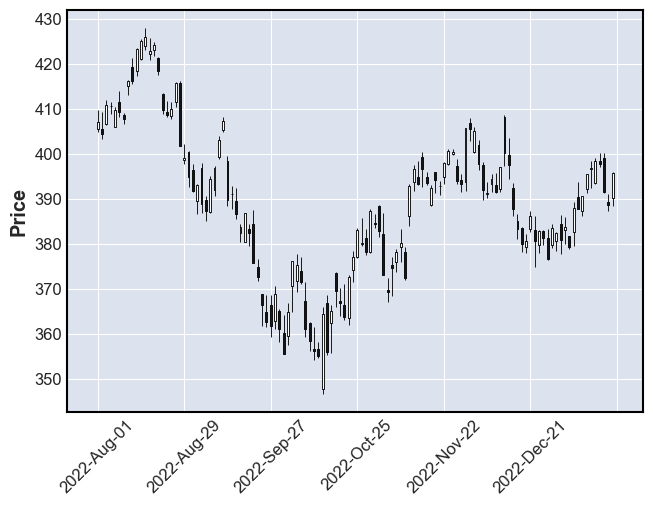

In [44]:
mpf.plot(hist, type = 'candle')

# Calculate Momentum of a Turning Point

In [25]:
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,momentum
Date,,,,,,,,,
2022-08-01 00:00:00-04:00,405.61,409.84,404.87,407.22,69997500,0.0,0.0,0.0,1.008963
2022-08-02 00:00:00-04:00,405.58,409.43,403.30,404.53,63435400,0.0,0.0,0.0,1.015673
2022-08-03 00:00:00-04:00,406.75,412.09,406.46,410.87,67820600,0.0,0.0,0.0,0.999319
2022-08-04 00:00:00-04:00,410.79,411.50,408.88,410.59,45656600,0.0,0.0,0.0,0.998319
2022-08-05 00:00:00-04:00,406.12,410.57,406.06,409.90,56814900,0.0,0.0,0.0,1.015760


In [26]:
410.87/407.22

1.008963213987525

In [100]:
hist['momentum_peak'] = hist.Close.rolling(window=9, min_periods=8, center=False).apply(
        lambda x: max(x[1:8])/x[0]).shift(-8)

# hist
peak = hist.loc[hist.momentum_peak > 1.05].copy()
peak

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,momentum,momentum_peak
Date,,,,,,,,,,
2022-09-06 00:00:00-04:00,389.73,390.71,385.06,387.38,76637400,0.0,0.0,0.0,1.051732,1.051732
2022-09-30 00:00:00-04:00,360.15,364.24,355.41,355.55,153711200,0.0,0.0,0.0,1.058192,1.058192
2022-10-14 00:00:00-04:00,366.87,368.57,355.33,356.00,123737000,0.0,0.0,0.0,1.076292,1.076292
2022-10-19 00:00:00-04:00,367.30,370.15,363.88,366.82,79746900,0.0,0.0,0.0,1.055668,1.055668
2022-10-20 00:00:00-04:00,366.35,370.97,362.94,363.74,88283100,0.0,0.0,0.0,1.064607,1.064607
2022-11-02 00:00:00-04:00,382.15,386.85,373.05,373.16,126990400,0.0,0.0,0.0,1.063056,1.063056
2022-11-03 00:00:00-04:00,369.77,372.49,367.10,369.31,87100100,0.0,0.0,0.0,1.074138,1.074138
2022-11-04 00:00:00-04:00,375.28,377.14,368.31,374.63,103505200,0.0,0.0,0.0,1.058885,1.058885
2022-11-09 00:00:00-05:00,378.19,379.40,371.90,372.42,78495500,0.0,0.0,0.0,1.065168,1.065168


In [101]:
hist['momentum'] = hist.Close.rolling(window=9, min_periods=8, center=False).apply(
        lambda x: min(x[1:8])/x[0]).shift(-8)

# hist
trough = hist.loc[hist.momentum < 0.95].copy()
trough

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,momentum,momentum_peak
Date,,,,,,,,,,
2022-08-17 00:00:00-04:00,422.23,425.79,420.87,422.96,63563400,0.0,0.0,0.0,0.949995,1.002908
2022-08-18 00:00:00-04:00,423.17,424.91,421.82,424.19,49023200,0.0,0.0,0.0,0.940970,0.986563
2022-08-19 00:00:00-04:00,421.31,421.58,417.58,418.49,68016900,0.0,0.0,0.0,0.943320,0.993763
2022-08-24 00:00:00-04:00,408.55,411.52,407.83,410.09,49177800,0.0,0.0,0.0,0.948206,1.014119
2022-08-25 00:00:00-04:00,411.65,415.93,410.51,415.88,50942300,0.0,0.0,0.0,0.931471,0.966168
2022-09-09 00:00:00-04:00,399.26,403.99,398.98,403.09,76706900,0.0,0.0,0.0,0.948498,1.010742
2022-09-12 00:00:00-04:00,405.25,408.17,404.93,407.42,69256300,0.0,0.0,0.0,0.922046,0.960164
2022-09-14 00:00:00-04:00,391.06,392.78,387.74,391.19,85023700,0.0,0.0,0.0,0.936297,0.988701
2022-09-15 00:00:00-04:00,389.56,392.54,385.42,386.75,87633800,0.0,0.0,0.0,0.937660,1.000052


In [121]:
peak = np.where(hist.momentum < 0.95, 1, np.nan) * hist.High * 1.01
# test

trough = np.where(hist.momentum_peak > 1.05, 1, np.nan) * hist.Low * 0.99
# peak

In [239]:
test = pd.Series({peak[~np.isnan(peak)].index[0]:peak[~np.isnan(peak)].iloc[0]})

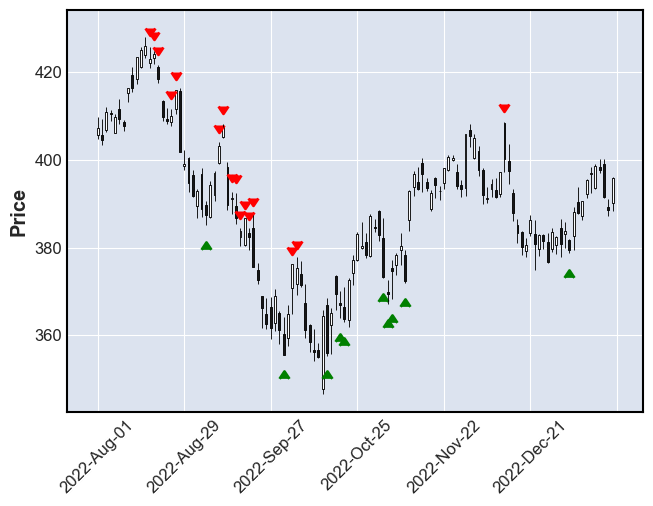

In [251]:
buy = mpf.make_addplot(trough, scatter=True, markersize=50, marker=6, color='green')
sell = mpf.make_addplot(peak, scatter=True, markersize=50, marker=11, color='red')
# sell = mpf.make_addplot(test, scatter = True, markersize = 50, marker = 11, color='red')

apds = [buy, sell]

mpf.plot(hist, type='candle', addplot=apds)
# mpf.plot(hist, type='candle', addplot=apds)
# mpf.plot(hist, type='candle')

In [127]:
peak.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 120 entries, 2022-08-01 00:00:00-04:00 to 2023-01-20 00:00:00-05:00
Series name: High
Non-Null Count  Dtype  
--------------  -----  
16 non-null     float64
dtypes: float64(1)
memory usage: 1.9 KB


In [156]:
peak[peak==max(peak[~np.isnan(peak)][:'2022-09-06'])]
# ['2022-08-17']

Date
2022-08-17 00:00:00-04:00    430.0479
Name: High, dtype: float64

Determine min date that is the starting point. <br>
Go to other list and determine first number there. <br>
find max from first list that occurs before first from second list, save value <br>
Alternate till complete list <br>

In [159]:
min(peak.index) < min(trough.index)

False

<bound method Series.info of Date
2022-08-01 00:00:00-04:00   NaN
2022-08-02 00:00:00-04:00   NaN
2022-08-03 00:00:00-04:00   NaN
2022-08-04 00:00:00-04:00   NaN
2022-08-05 00:00:00-04:00   NaN
                             ..
2023-01-13 00:00:00-05:00   NaN
2023-01-17 00:00:00-05:00   NaN
2023-01-18 00:00:00-05:00   NaN
2023-01-19 00:00:00-05:00   NaN
2023-01-20 00:00:00-05:00   NaN
Name: High, Length: 120, dtype: float64>

In [237]:
peak[~np.isnan(peak)].iloc[0]

430.0479

In [241]:
peak[~np.isnan(peak)]

Date
2022-08-17 00:00:00-04:00    430.0479
2022-08-18 00:00:00-04:00    429.1591
2022-08-19 00:00:00-04:00    425.7958
2022-08-24 00:00:00-04:00    415.6352
2022-08-25 00:00:00-04:00    420.0893
2022-09-09 00:00:00-04:00    408.0299
2022-09-12 00:00:00-04:00    412.2517
2022-09-14 00:00:00-04:00    396.7078
2022-09-15 00:00:00-04:00    396.4654
2022-09-16 00:00:00-04:00    388.3248
2022-09-19 00:00:00-04:00    390.6377
2022-09-20 00:00:00-04:00    388.2036
2022-09-21 00:00:00-04:00    391.4053
2022-10-04 00:00:00-04:00    380.0327
2022-10-05 00:00:00-04:00    381.5073
2022-12-13 00:00:00-05:00    412.6961
Name: High, dtype: float64

In [252]:
def PeakAndTrough(peak, trough):
    pdat = peak[~np.isnan(peak)].copy()
    tdat = trough[~np.isnan(trough)].copy()
    
    pdt = []
    pval = []
    
    tdt = []
    tval = []
    
    if min(peak[~np.isnan(peak)].index) < min(trough[~np.isnan(trough)].index):
        while ((len(pdat) > 0) & (len(tdat) > 0)):
            pdt.append(pdat[:tdat.index[0]].idxmax())
            pval.append(pdat.loc[pdat[:tdat.index[0]].idxmax()])
            pdat = pdat.drop(pdat[:tdat.index[0]].index)
            
            if len(pdat > 0):
                tdt.append(tdat[:pdat.index[0]].idxmin())
                tval.append(tdat.loc[tdat[:pdat.index[0]].idxmin()])
                tdat = tdat.drop(tdat[:pdat.index[0]].index)
            else:
                tdt.append(tdat.idxmin())
                tval.append(tdat.loc[tdat.idxmin()])
                tdat = tdat.iloc[0:0]
#         print('Peak is first')
    else:
        print('trough is first') 
        
    data = {'peakDt': pdt, 'peakVal': pval, 'troughDt': tdt, 'troughVal': tval}
    pdf = pd.DataFrame.from_dict(data)
    
    return pdf

In [253]:
test = PeakAndTrough(peak = peak, trough = trough)
test

,peakDt,peakVal,troughDt,troughVal
0,2022-08-17 00:00:00-04:00,430.0479,2022-09-06 00:00:00-04:00,381.2094
1,2022-09-12 00:00:00-04:00,412.2517,2022-09-30 00:00:00-04:00,351.8559
2,2022-10-05 00:00:00-04:00,381.5073,2022-10-14 00:00:00-04:00,351.7767
3,2022-12-13 00:00:00-05:00,412.6961,2023-01-05 00:00:00-05:00,374.9724


In [162]:
if min(peak[~np.isnan(peak)].index) < min(trough[~np.isnan(trough)].index):
    print('Peak is first')
else:
    print('trough is first')

Peak is first


In [199]:
p_dat.loc[p_dat[:t_dat.index[0]].idxmax()]

430.0479

In [206]:
peakdt = []
peakval = []
peakdt.append(p_dat[:t_dat.index[0]].idxmax())
peakval.append(p_dat.loc[p_dat[:t_dat.index[0]].idxmax()])


In [210]:
test = p_dat.copy()

In [211]:
p_dat = p_dat.drop(p_dat[:t_dat.index[0]].index)

In [215]:
p_dat

Date
2022-09-09 00:00:00-04:00    408.0299
2022-09-12 00:00:00-04:00    412.2517
2022-09-14 00:00:00-04:00    396.7078
2022-09-15 00:00:00-04:00    396.4654
2022-09-16 00:00:00-04:00    388.3248
2022-09-19 00:00:00-04:00    390.6377
2022-09-20 00:00:00-04:00    388.2036
2022-09-21 00:00:00-04:00    391.4053
2022-10-04 00:00:00-04:00    380.0327
2022-10-05 00:00:00-04:00    381.5073
2022-12-13 00:00:00-05:00    412.6961
Name: High, dtype: float64

In [216]:
t_dat

Date
2022-09-06 00:00:00-04:00    381.2094
2022-09-30 00:00:00-04:00    351.8559
2022-10-14 00:00:00-04:00    351.7767
2022-10-19 00:00:00-04:00    360.2412
2022-10-20 00:00:00-04:00    359.3106
2022-11-02 00:00:00-04:00    369.3195
2022-11-03 00:00:00-04:00    363.4290
2022-11-04 00:00:00-04:00    364.6269
2022-11-09 00:00:00-05:00    368.1810
2023-01-05 00:00:00-05:00    374.9724
Name: Low, dtype: float64

In [214]:
p_dat.index[0]

Timestamp('2022-09-09 00:00:00-0400', tz='America/New_York')

In [212]:
t_dat[:p_dat.index[0]]

Date
2022-09-06 00:00:00-04:00    381.2094
Name: Low, dtype: float64

In [217]:
troughdt = []
troughval = []
troughdt.append(t_dat[:p_dat.index[0]].idxmax())
troughval.append(t_dat.loc[t_dat[:p_dat.index[0]].idxmax()])

troughdt

[Timestamp('2022-09-06 00:00:00-0400', tz='America/New_York')]

In [218]:
t_dat = t_dat.drop(t_dat[:p_dat.index[0]].index)
t_dat

Date
2022-09-30 00:00:00-04:00    351.8559
2022-10-14 00:00:00-04:00    351.7767
2022-10-19 00:00:00-04:00    360.2412
2022-10-20 00:00:00-04:00    359.3106
2022-11-02 00:00:00-04:00    369.3195
2022-11-03 00:00:00-04:00    363.4290
2022-11-04 00:00:00-04:00    364.6269
2022-11-09 00:00:00-05:00    368.1810
2023-01-05 00:00:00-05:00    374.9724
Name: Low, dtype: float64

In [219]:
p_dat[:t_dat.index[0]].idxmax()

Timestamp('2022-09-12 00:00:00-0400', tz='America/New_York')

In [220]:
t_dat.index[0]

Timestamp('2022-09-30 00:00:00-0400', tz='America/New_York')

In [229]:
((len(p_dat)==0) & (len(t_dat)==0))

False

In [172]:
t_dat = trough[~np.isnan(trough)]
t_dat

Date
2022-09-06 00:00:00-04:00    381.2094
2022-09-30 00:00:00-04:00    351.8559
2022-10-14 00:00:00-04:00    351.7767
2022-10-19 00:00:00-04:00    360.2412
2022-10-20 00:00:00-04:00    359.3106
2022-11-02 00:00:00-04:00    369.3195
2022-11-03 00:00:00-04:00    363.4290
2022-11-04 00:00:00-04:00    364.6269
2022-11-09 00:00:00-05:00    368.1810
2023-01-05 00:00:00-05:00    374.9724
Name: Low, dtype: float64

In [173]:
p_dat = peak[~np.isnan(peak)]
p_dat

Date
2022-08-17 00:00:00-04:00    430.0479
2022-08-18 00:00:00-04:00    429.1591
2022-08-19 00:00:00-04:00    425.7958
2022-08-24 00:00:00-04:00    415.6352
2022-08-25 00:00:00-04:00    420.0893
2022-09-09 00:00:00-04:00    408.0299
2022-09-12 00:00:00-04:00    412.2517
2022-09-14 00:00:00-04:00    396.7078
2022-09-15 00:00:00-04:00    396.4654
2022-09-16 00:00:00-04:00    388.3248
2022-09-19 00:00:00-04:00    390.6377
2022-09-20 00:00:00-04:00    388.2036
2022-09-21 00:00:00-04:00    391.4053
2022-10-04 00:00:00-04:00    380.0327
2022-10-05 00:00:00-04:00    381.5073
2022-12-13 00:00:00-05:00    412.6961
Name: High, dtype: float64

In [174]:
min_trough = min(t_dat[~np.isnan(t_dat)].index)
min_trough

Timestamp('2022-09-06 00:00:00-0400', tz='America/New_York')

In [178]:
p_dat[p_dat.index < min_trough].index

DatetimeIndex(['2022-08-17 00:00:00-04:00', '2022-08-18 00:00:00-04:00',
               '2022-08-19 00:00:00-04:00', '2022-08-24 00:00:00-04:00',
               '2022-08-25 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', freq=None)

In [179]:
# grab last index value for trough analysis
p_dat[p_dat.index < min_trough].index[-1]

Timestamp('2022-08-25 00:00:00-0400', tz='America/New_York')

In [177]:
p_dat[p_dat == max(p_dat[p_dat.index < min_trough])].index

DatetimeIndex(['2022-08-17 00:00:00-04:00'], dtype='datetime64[ns, America/New_York]', name='Date', freq=None)

In [181]:
p_dat

Date
2022-08-17 00:00:00-04:00    430.0479
2022-08-18 00:00:00-04:00    429.1591
2022-08-19 00:00:00-04:00    425.7958
2022-08-24 00:00:00-04:00    415.6352
2022-08-25 00:00:00-04:00    420.0893
2022-09-09 00:00:00-04:00    408.0299
2022-09-12 00:00:00-04:00    412.2517
2022-09-14 00:00:00-04:00    396.7078
2022-09-15 00:00:00-04:00    396.4654
2022-09-16 00:00:00-04:00    388.3248
2022-09-19 00:00:00-04:00    390.6377
2022-09-20 00:00:00-04:00    388.2036
2022-09-21 00:00:00-04:00    391.4053
2022-10-04 00:00:00-04:00    380.0327
2022-10-05 00:00:00-04:00    381.5073
2022-12-13 00:00:00-05:00    412.6961
Name: High, dtype: float64

In [182]:
t_dat

Date
2022-09-06 00:00:00-04:00    381.2094
2022-09-30 00:00:00-04:00    351.8559
2022-10-14 00:00:00-04:00    351.7767
2022-10-19 00:00:00-04:00    360.2412
2022-10-20 00:00:00-04:00    359.3106
2022-11-02 00:00:00-04:00    369.3195
2022-11-03 00:00:00-04:00    363.4290
2022-11-04 00:00:00-04:00    364.6269
2022-11-09 00:00:00-05:00    368.1810
2023-01-05 00:00:00-05:00    374.9724
Name: Low, dtype: float64

In [180]:
peak[~np.isnan(peak) & peak[~np.isnan(peak)].index < min_trough]

ValueError: operands could not be broadcast together with shapes (120,) (16,) 

In [171]:
peak[peak.index < min_trough]

Date
2022-08-01 00:00:00-04:00         NaN
2022-08-02 00:00:00-04:00         NaN
2022-08-03 00:00:00-04:00         NaN
2022-08-04 00:00:00-04:00         NaN
2022-08-05 00:00:00-04:00         NaN
2022-08-08 00:00:00-04:00         NaN
2022-08-09 00:00:00-04:00         NaN
2022-08-10 00:00:00-04:00         NaN
2022-08-11 00:00:00-04:00         NaN
2022-08-12 00:00:00-04:00         NaN
2022-08-15 00:00:00-04:00         NaN
2022-08-16 00:00:00-04:00         NaN
2022-08-17 00:00:00-04:00    430.0479
2022-08-18 00:00:00-04:00    429.1591
2022-08-19 00:00:00-04:00    425.7958
2022-08-22 00:00:00-04:00         NaN
2022-08-23 00:00:00-04:00         NaN
2022-08-24 00:00:00-04:00    415.6352
2022-08-25 00:00:00-04:00    420.0893
2022-08-26 00:00:00-04:00         NaN
2022-08-29 00:00:00-04:00         NaN
2022-08-30 00:00:00-04:00         NaN
2022-08-31 00:00:00-04:00         NaN
2022-09-01 00:00:00-04:00         NaN
2022-09-02 00:00:00-04:00         NaN
Name: High, dtype: float64

In [157]:
trough[~np.isnan(trough)]

Date
2022-09-06 00:00:00-04:00    381.2094
2022-09-30 00:00:00-04:00    351.8559
2022-10-14 00:00:00-04:00    351.7767
2022-10-19 00:00:00-04:00    360.2412
2022-10-20 00:00:00-04:00    359.3106
2022-11-02 00:00:00-04:00    369.3195
2022-11-03 00:00:00-04:00    363.4290
2022-11-04 00:00:00-04:00    364.6269
2022-11-09 00:00:00-05:00    368.1810
2023-01-05 00:00:00-05:00    374.9724
Name: Low, dtype: float64

In [135]:
peak.head(50)

Date
2022-08-01 00:00:00-04:00         NaN
2022-08-02 00:00:00-04:00         NaN
2022-08-03 00:00:00-04:00         NaN
2022-08-04 00:00:00-04:00         NaN
2022-08-05 00:00:00-04:00         NaN
2022-08-08 00:00:00-04:00         NaN
2022-08-09 00:00:00-04:00         NaN
2022-08-10 00:00:00-04:00         NaN
2022-08-11 00:00:00-04:00         NaN
2022-08-12 00:00:00-04:00         NaN
2022-08-15 00:00:00-04:00         NaN
2022-08-16 00:00:00-04:00         NaN
2022-08-17 00:00:00-04:00    430.0479
2022-08-18 00:00:00-04:00    429.1591
2022-08-19 00:00:00-04:00    425.7958
2022-08-22 00:00:00-04:00         NaN
2022-08-23 00:00:00-04:00         NaN
2022-08-24 00:00:00-04:00    415.6352
2022-08-25 00:00:00-04:00    420.0893
2022-08-26 00:00:00-04:00         NaN
2022-08-29 00:00:00-04:00         NaN
2022-08-30 00:00:00-04:00         NaN
2022-08-31 00:00:00-04:00         NaN
2022-09-01 00:00:00-04:00         NaN
2022-09-02 00:00:00-04:00         NaN
2022-09-06 00:00:00-04:00         NaN
2022-09

In [56]:
minimaIdxs = np.flatnonzero(
 hist.momentum.rolling(window=3, min_periods=1, center=True).aggregate(
   lambda x: len(x) == 3 and x[0] < 1 and x[0] > x[1] and x[2] > x[1])).tolist()

minimaIdxs

[33,
 76,
 88,
 109,
 135,
 152,
 173,
 221,
 277,
 280,
 287,
 325,
 353,
 414,
 422,
 440,
 450,
 465,
 511,
 526,
 608,
 665,
 667,
 673,
 680,
 749,
 760,
 790,
 815,
 823,
 834,
 857,
 868,
 876,
 912,
 927,
 929,
 939,
 957,
 979,
 987,
 996,
 997,
 998,
 999]

In [66]:
maximaIdxs = np.flatnonzero(
 hist.momentum.rolling(window=5, min_periods=1, center=True).aggregate(
   lambda x: len(x) == 5 and x[0] > 1 and x[0] < x[2] and x[4] < x[2])).tolist()

In [67]:
maximaIdxs

[8,
 9,
 17,
 18,
 21,
 25,
 29,
 30,
 36,
 41,
 44,
 49,
 50,
 58,
 59,
 64,
 65,
 69,
 73,
 81,
 94,
 95,
 104,
 105,
 113,
 120,
 128,
 129,
 132,
 140,
 146,
 158,
 159,
 163,
 181,
 185,
 194,
 195,
 199,
 200,
 204,
 205,
 208,
 209,
 216,
 217,
 224,
 228,
 229,
 234,
 235,
 241,
 246,
 249,
 250,
 263,
 264,
 268,
 274,
 297,
 298,
 306,
 307,
 312,
 315,
 321,
 328,
 335,
 340,
 341,
 346,
 347,
 360,
 365,
 366,
 373,
 378,
 379,
 388,
 389,
 396,
 403,
 404,
 408,
 409,
 418,
 426,
 427,
 435,
 436,
 444,
 453,
 454,
 461,
 462,
 468,
 469,
 473,
 474,
 482,
 483,
 490,
 491,
 496,
 497,
 504,
 505,
 509,
 514,
 515,
 522,
 529,
 532,
 538,
 551,
 555,
 556,
 560,
 564,
 565,
 568,
 572,
 575,
 579,
 580,
 586,
 597,
 600,
 603,
 604,
 611,
 612,
 617,
 618,
 623,
 624,
 632,
 637,
 640,
 641,
 647,
 648,
 654,
 658,
 659,
 663,
 671,
 676,
 685,
 686,
 691,
 692,
 699,
 702,
 705,
 723,
 727,
 732,
 739,
 740,
 746,
 747,
 752,
 753,
 764,
 765,
 770,
 783,
 784,
 787,
 796

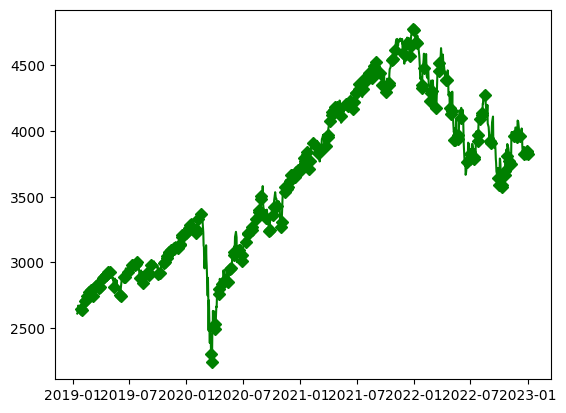

In [65]:
plt.plot(hist.index, hist.Close, '-gD', markevery=maximaIdxs, label='Momentum Minimum')

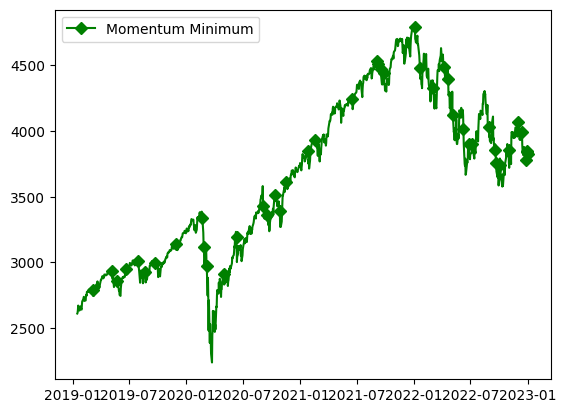

In [59]:
plt.plot(hist.index, hist.Close, '-gD', markevery=minimaIdxs, label='Momentum Minimum')
plt.legend()
plt.show()

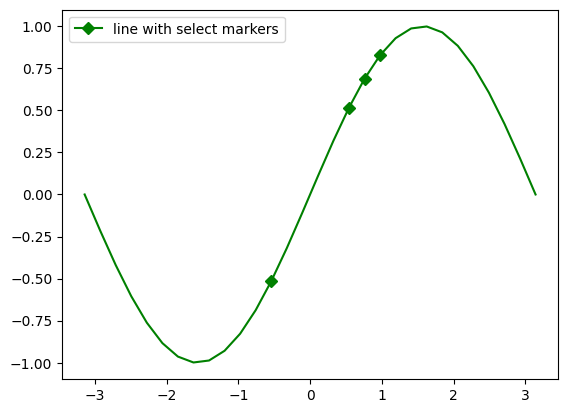

In [35]:
xs = np.linspace(-np.pi, np.pi, 30)
ys = np.sin(xs)
markers_on = [12, 17, 18, 19]
plt.plot(xs, ys, '-gD', markevery=markers_on, label='line with select markers')
plt.legend()
plt.show()


In [76]:
minimaIdxs

[33,
 76,
 88,
 109,
 135,
 152,
 173,
 221,
 277,
 280,
 287,
 325,
 353,
 414,
 422,
 440,
 450,
 465,
 511,
 526,
 608,
 665,
 667,
 673,
 680,
 749,
 760,
 790,
 815,
 823,
 834,
 857,
 868,
 876,
 912,
 927,
 929,
 939,
 957,
 979,
 987,
 996,
 997,
 998,
 999]

In [77]:
maximaIdxs

[8,
 9,
 17,
 18,
 21,
 25,
 29,
 30,
 36,
 41,
 44,
 49,
 50,
 58,
 59,
 64,
 65,
 69,
 73,
 81,
 94,
 95,
 104,
 105,
 113,
 120,
 128,
 129,
 132,
 140,
 146,
 158,
 159,
 163,
 181,
 185,
 194,
 195,
 199,
 200,
 204,
 205,
 208,
 209,
 216,
 217,
 224,
 228,
 229,
 234,
 235,
 241,
 246,
 249,
 250,
 263,
 264,
 268,
 274,
 297,
 298,
 306,
 307,
 312,
 315,
 321,
 328,
 335,
 340,
 341,
 346,
 347,
 360,
 365,
 366,
 373,
 378,
 379,
 388,
 389,
 396,
 403,
 404,
 408,
 409,
 418,
 426,
 427,
 435,
 436,
 444,
 453,
 454,
 461,
 462,
 468,
 469,
 473,
 474,
 482,
 483,
 490,
 491,
 496,
 497,
 504,
 505,
 509,
 514,
 515,
 522,
 529,
 532,
 538,
 551,
 555,
 556,
 560,
 564,
 565,
 568,
 572,
 575,
 579,
 580,
 586,
 597,
 600,
 603,
 604,
 611,
 612,
 617,
 618,
 623,
 624,
 632,
 637,
 640,
 641,
 647,
 648,
 654,
 658,
 659,
 663,
 671,
 676,
 685,
 686,
 691,
 692,
 699,
 702,
 705,
 723,
 727,
 732,
 739,
 740,
 746,
 747,
 752,
 753,
 764,
 765,
 770,
 783,
 784,
 787,
 796

In [81]:
res = []
for i in maximaIdxs:
    res.append(i > 33 and i < 76)
    
res

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 Fa

In [94]:
from itertools import compress

In [104]:
list(compress(maximaIdxs, res))

[36, 41, 44, 49, 50, 58, 59, 64, 65, 69, 73]

In [111]:
max(hist.Close[list(compress(maximaIdxs, res))])

2926.17

In [112]:
hist.index[hist.Close == max(hist.Close[list(compress(maximaIdxs, res))])].tolist()

[Timestamp('2019-04-25 00:00:00-0400', tz='America/New_York')]

In [92]:
type(maximaIdxs)

list

In [79]:
len(minimaIdxs)

45

In [80]:
len(maximaIdxs)

213

In [ ]:
minimaIdxs = np.flatnonzero(
 hist.Close.rolling(window=3, min_periods=1, center=True).aggregate(
   lambda x: len(x) == 3 and x[0] > x[1] and x[2] > x[1])).tolist()

In [116]:
minimaIdxs = np.flatnonzero(
 hist.Close.rolling(window=3, min_periods=1, center=True).aggregate(
   lambda x: len(x) == 3 and x[0] > x[1] and x[2] > x[1])).tolist()
maximaIdxs = np.flatnonzero(
 hist.Close.rolling(window=3, min_periods=1, center=True).aggregate(
   lambda x: len(x) == 3 and x[0] < x[1] and x[2] < x[1])).tolist()

In [119]:
minimaIdxs2 = minimaIdxs

In [122]:
hs = hist.Close.loc[hist.Close.shift(-1) != hist.Close]
x = hs.rolling(window=3, center=True).aggregate(lambda x: x[0] > x[1] and x[2] > x[1])
minimaIdxs = [hist.index.get_loc(y) for y in x[x == 1].index]
x = hs.rolling(window=3, center=True).aggregate(lambda x: x[0] < x[1] and x[2] < x[1])
maximaIdxs = [hist.index.get_loc(y) for y in x[x == 1].index]

In [123]:
minimaIdxs

[4,
 9,
 16,
 21,
 25,
 30,
 36,
 40,
 44,
 47,
 49,
 58,
 62,
 64,
 69,
 74,
 79,
 81,
 86,
 89,
 92,
 95,
 102,
 104,
 112,
 119,
 126,
 128,
 132,
 139,
 144,
 146,
 150,
 153,
 155,
 159,
 163,
 168,
 174,
 177,
 180,
 184,
 188,
 190,
 192,
 194,
 199,
 201,
 204,
 208,
 216,
 223,
 228,
 234,
 238,
 241,
 244,
 246,
 249,
 251,
 255,
 259,
 261,
 263,
 268,
 272,
 274,
 282,
 284,
 288,
 291,
 293,
 295,
 298,
 302,
 305,
 307,
 309,
 312,
 314,
 318,
 320,
 323,
 326,
 329,
 334,
 338,
 340,
 344,
 349,
 354,
 358,
 360,
 363,
 365,
 371,
 373,
 375,
 378,
 384,
 386,
 388,
 396,
 399,
 402,
 410,
 415,
 417,
 424,
 426,
 430,
 433,
 435,
 442,
 444,
 446,
 451,
 453,
 458,
 460,
 462,
 466,
 468,
 471,
 473,
 476,
 478,
 483,
 489,
 493,
 496,
 501,
 505,
 509,
 512,
 514,
 522,
 529,
 533,
 537,
 539,
 545,
 548,
 551,
 555,
 559,
 563,
 565,
 569,
 571,
 575,
 577,
 579,
 585,
 590,
 592,
 594,
 598,
 600,
 602,
 604,
 611,
 614,
 622,
 624,
 627,
 631,
 638,
 641,
 643,
 646

In [124]:
minimaIdxs2

[4,
 9,
 16,
 21,
 25,
 30,
 36,
 40,
 44,
 47,
 49,
 58,
 62,
 64,
 69,
 74,
 79,
 81,
 86,
 89,
 92,
 95,
 102,
 104,
 112,
 119,
 126,
 128,
 132,
 139,
 144,
 146,
 150,
 153,
 155,
 159,
 163,
 168,
 174,
 177,
 180,
 184,
 188,
 190,
 192,
 194,
 199,
 201,
 204,
 208,
 216,
 223,
 228,
 234,
 238,
 241,
 244,
 246,
 249,
 251,
 255,
 259,
 261,
 263,
 268,
 272,
 274,
 282,
 284,
 288,
 291,
 293,
 295,
 298,
 302,
 305,
 307,
 309,
 312,
 314,
 318,
 320,
 323,
 326,
 329,
 334,
 338,
 340,
 344,
 349,
 354,
 358,
 360,
 363,
 365,
 371,
 373,
 375,
 378,
 384,
 386,
 388,
 396,
 399,
 402,
 410,
 415,
 417,
 424,
 426,
 430,
 433,
 435,
 442,
 444,
 446,
 451,
 453,
 458,
 460,
 462,
 466,
 468,
 471,
 473,
 476,
 478,
 483,
 489,
 493,
 496,
 501,
 505,
 509,
 512,
 514,
 522,
 529,
 533,
 537,
 539,
 545,
 548,
 551,
 555,
 559,
 563,
 565,
 569,
 571,
 575,
 577,
 579,
 585,
 590,
 592,
 594,
 598,
 600,
 602,
 604,
 611,
 614,
 622,
 624,
 627,
 631,
 638,
 641,
 643,
 646

In [127]:
def get_bestfit3(x0, y0, x1, y1, x2, y2):
  xbar, ybar = (x0 + x1 + x2) / 3, (y0 + y1 + y2) / 3
  xb0, yb0, xb1, yb1, xb2, yb2 = x0-xbar, y0-ybar, x1-xbar, y1-ybar, x2-xbar, y2-ybar
  xs = xb0*xb0+xb1*xb1+xb2*xb2
  m = (xb0*yb0+xb1*yb1+xb2*yb2) / xs
  b = ybar - m * xbar
  ys0, ys1, ys2 = (y0 - (m * x0 + b)),(y1 - (m * x1 + b)),(y2 - (m * x2 + b))
  ys = ys0*ys0+ys1*ys1+ys2*ys2
  ser = np.sqrt(ys / xs)
  return m, b, ys, ser, ser * np.sqrt((x0*x0+x1*x1+x2*x2)/3)

In [136]:
scale = (hist.Close.max() - hist.Close.min()) / len(hist)

In [137]:
errpct = 0.005

In [138]:
fltpct=scale*errpct

In [139]:
def get_trend(Idxs):
  trend = []
  for x in range(len(Idxs)):
    for y in range(x+1, len(Idxs)):
      for z in range(y+1, len(Idxs)):
        trend.append(([Idxs[x], Idxs[y], Idxs[z]],
          get_bestfit3(Idxs[x], h[Idxs[x]],
                       Idxs[y], h[Idxs[y]],
                       Idxs[z], h[Idxs[z]])))
  return list(filter(lambda val: val[1][3] <= fltpct, trend))
mintrend, maxtrend = get_trend(minimaIdxs), get_trend(maximaIdxs)

In [140]:
mintrend

[([4, 9, 95],
  (1.2208158196408074,
   2628.5006304929307,
   0.49711645013392414,
   0.009745681368535123,
   0.5373987040315068)),
 ([4, 9, 139],
  (1.571837837837836,
   2626.240216216216,
   0.2884918918920055,
   0.004962091502765869,
   0.3992145758548089)),
 ([4, 9, 144],
  (1.7905416116248334,
   2624.828322324967,
   1.7179656538972679,
   0.011669034502776832,
   0.9724117625106165)),
 ([4, 9, 146],
  (1.463399045125519,
   2626.9398506083476,
   0.023566148159568753,
   0.0013471209884837693,
   0.113811129577878)),
 ([4, 9, 150],
  (1.8397571685022573,
   2624.509860511377,
   2.204456418902931,
   0.012666215029394154,
   1.0992883414057333)),
 ([4, 9, 153],
  (1.4379365485778137,
   2627.1041776453612,
   0.0040250104743827795,
   0.000530153813126932,
   0.046927846812454356)),
 ([4, 9, 155],
  (1.5669457659372013,
   2626.271037107517,
   0.2701427212178778,
   0.004284806945460512,
   0.38421762975563006)),
 ([4, 9, 159],
  (1.7690300751879695,
   2624.9656090225562,


In [ ]:
maxtrend

In [129]:
def get_minmax(h):
    rollwin = pd.Series(h).rolling(window=3, min_periods=1, center=True)
    minFunc = lambda x: len(x) == 3 and x.iloc[0] > x.iloc[1] and x.iloc[2] > x.iloc[1]
    maxFunc = lambda x: len(x) == 3 and x.iloc[0] < x.iloc[1] and x.iloc[2] < x.iloc[1]
    numdiff_extrema = lambda func: np.flatnonzero(rollwin.aggregate(func)).tolist()
    return minFunc, maxFunc, numdiff_extrema  

In [130]:
test1, test2, test3 = get_minmax(hist.Close)

AttributeError: 'function' object has no attribute 'minFunc'